# Smart Mobility Traffic Analysis


In [1]:
#Importiamo le librerie 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Leggiamo il dataset
dataset = pd.read_csv('smart_mobility_dataset.csv')

dataset.head()


,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low


## 1 - Analisi Preliminare

In [2]:
#Visualizziamo i tipi delle colonne
print(f"{dataset.dtypes}\n")

print("Number of rows: ", dataset.shape[0])
print("Number of columns: ", dataset.shape[1])

Timestamp                  object
Latitude                  float64
Longitude                 float64
Vehicle_Count               int64
Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State        object
Weather_Condition          object
Accident_Report             int64
Sentiment_Score           float64
Ride_Sharing_Demand         int64
Parking_Availability        int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Traffic_Condition          object
dtype: object

Number of rows:  5000
Number of columns:  15


In [3]:
# calcolo statistiche descrittive
dataset.describe()

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.749645,-73.847433,153.921200,42.111096,54.748397,0.096000,-0.005652,50.487800,24.613000,272.174927,17.343243
std,0.086123,0.086204,83.523342,21.707720,26.145238,0.294621,0.583790,28.484426,14.532511,130.086372,7.208277
min,40.600016,-73.999987,10.000000,5.002789,10.005031,0.000000,-0.999819,1.000000,0.000000,50.136855,5.003787
25%,40.675403,-73.920281,80.000000,23.195752,32.089653,0.000000,-0.500154,26.000000,12.000000,160.564433,11.098761
50%,40.748875,-73.846058,156.000000,42.191599,54.657297,0.000000,-0.010564,50.000000,24.000000,272.045513,17.153791
75%,40.824735,-73.771685,226.000000,60.751760,77.581720,0.000000,0.500518,75.000000,37.000000,382.242055,23.516595
max,40.899972,-73.700159,299.000000,79.997556,99.999729,1.000000,0.999354,99.000000,49.000000,499.922663,29.995416


In [4]:
#Verifica dati mancanti 
missing_values = dataset.isnull().sum()
print(missing_values)

Timestamp                 0
Latitude                  0
Longitude                 0
Vehicle_Count             0
Traffic_Speed_kmh         0
Road_Occupancy_%          0
Traffic_Light_State       0
Weather_Condition         0
Accident_Report           0
Sentiment_Score           0
Ride_Sharing_Demand       0
Parking_Availability      0
Emission_Levels_g_km      0
Energy_Consumption_L_h    0
Traffic_Condition         0
dtype: int64


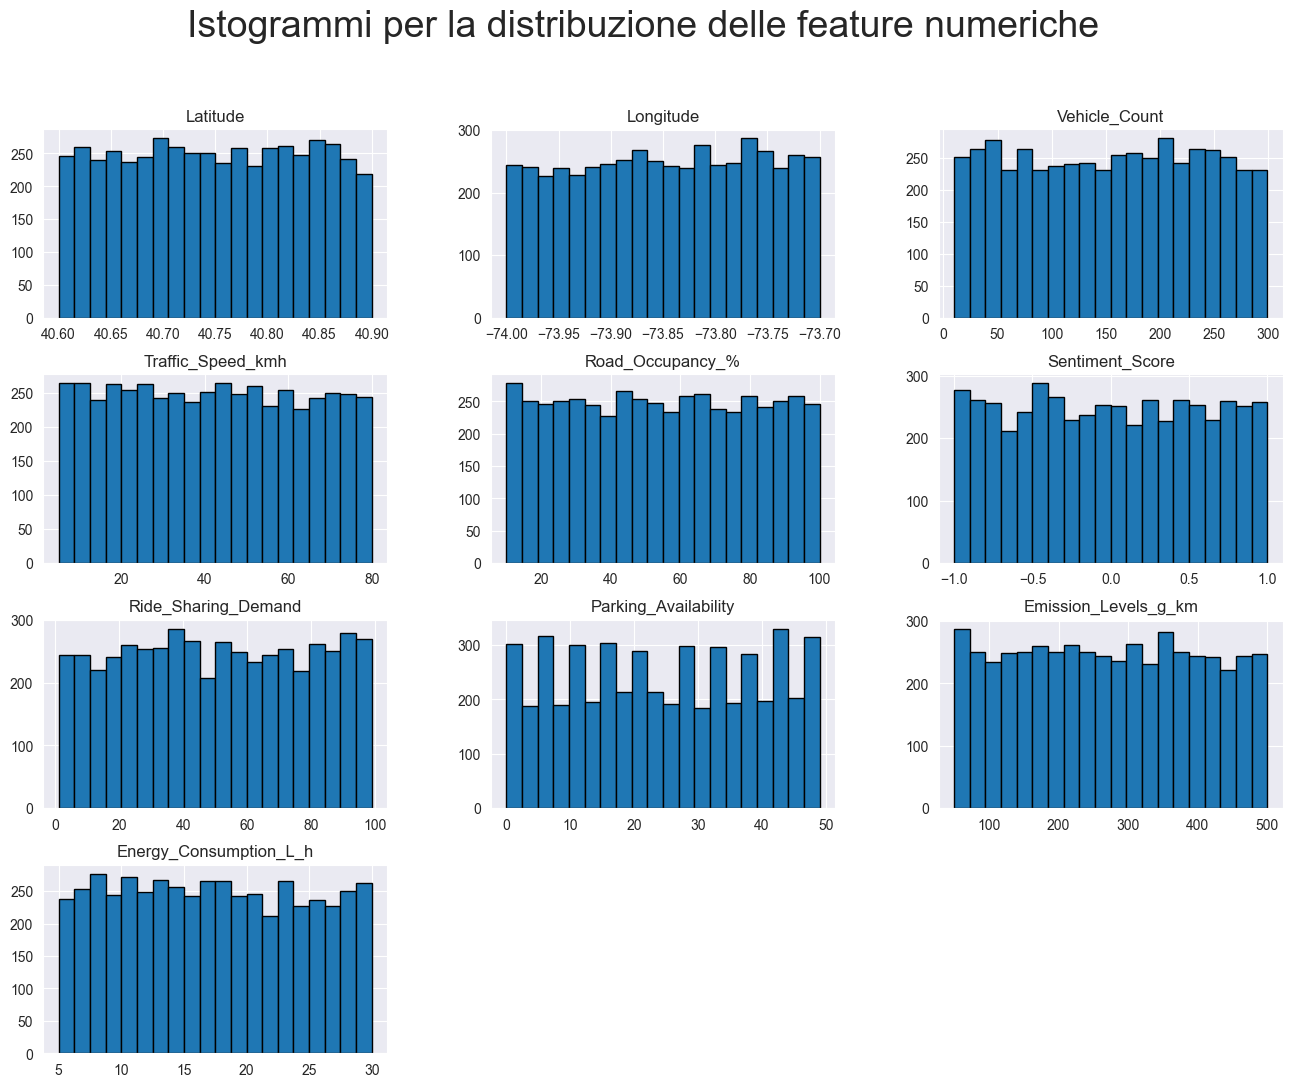

In [5]:
# Istogrammi per la distribuzione delle feature numeriche

# Elenco delle colonne da escludere
columns_to_exclude = ['Traffic_Light_State', 'Weather_Condition', 'Accident_Report' , 'Traffic_Condition']

# Creiamo il subset dei dati senza le feature da escludere
data_subset = dataset.drop(columns=columns_to_exclude)
data_subset.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Istogrammi per la distribuzione delle feature numeriche", fontsize=27)
plt.show()

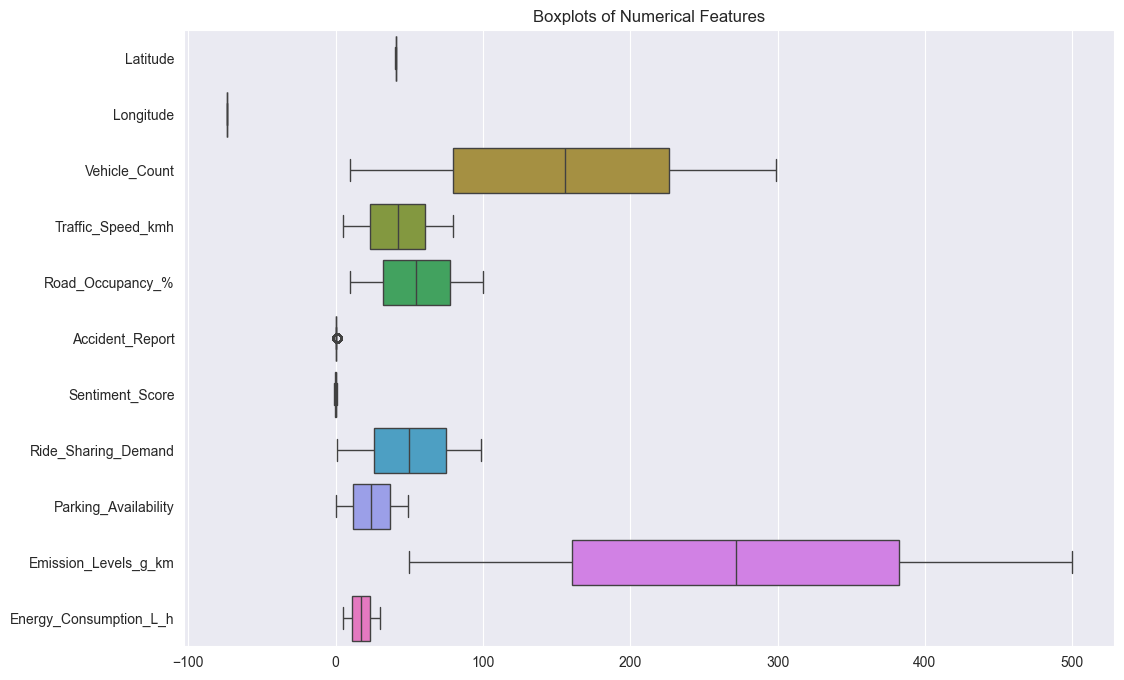

In [6]:
# Boxplot per le feature numeriche
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset, orient="h") #boxplot serve per vedere eventuali outliers
plt.title("Boxplots of Numerical Features")
plt.show()

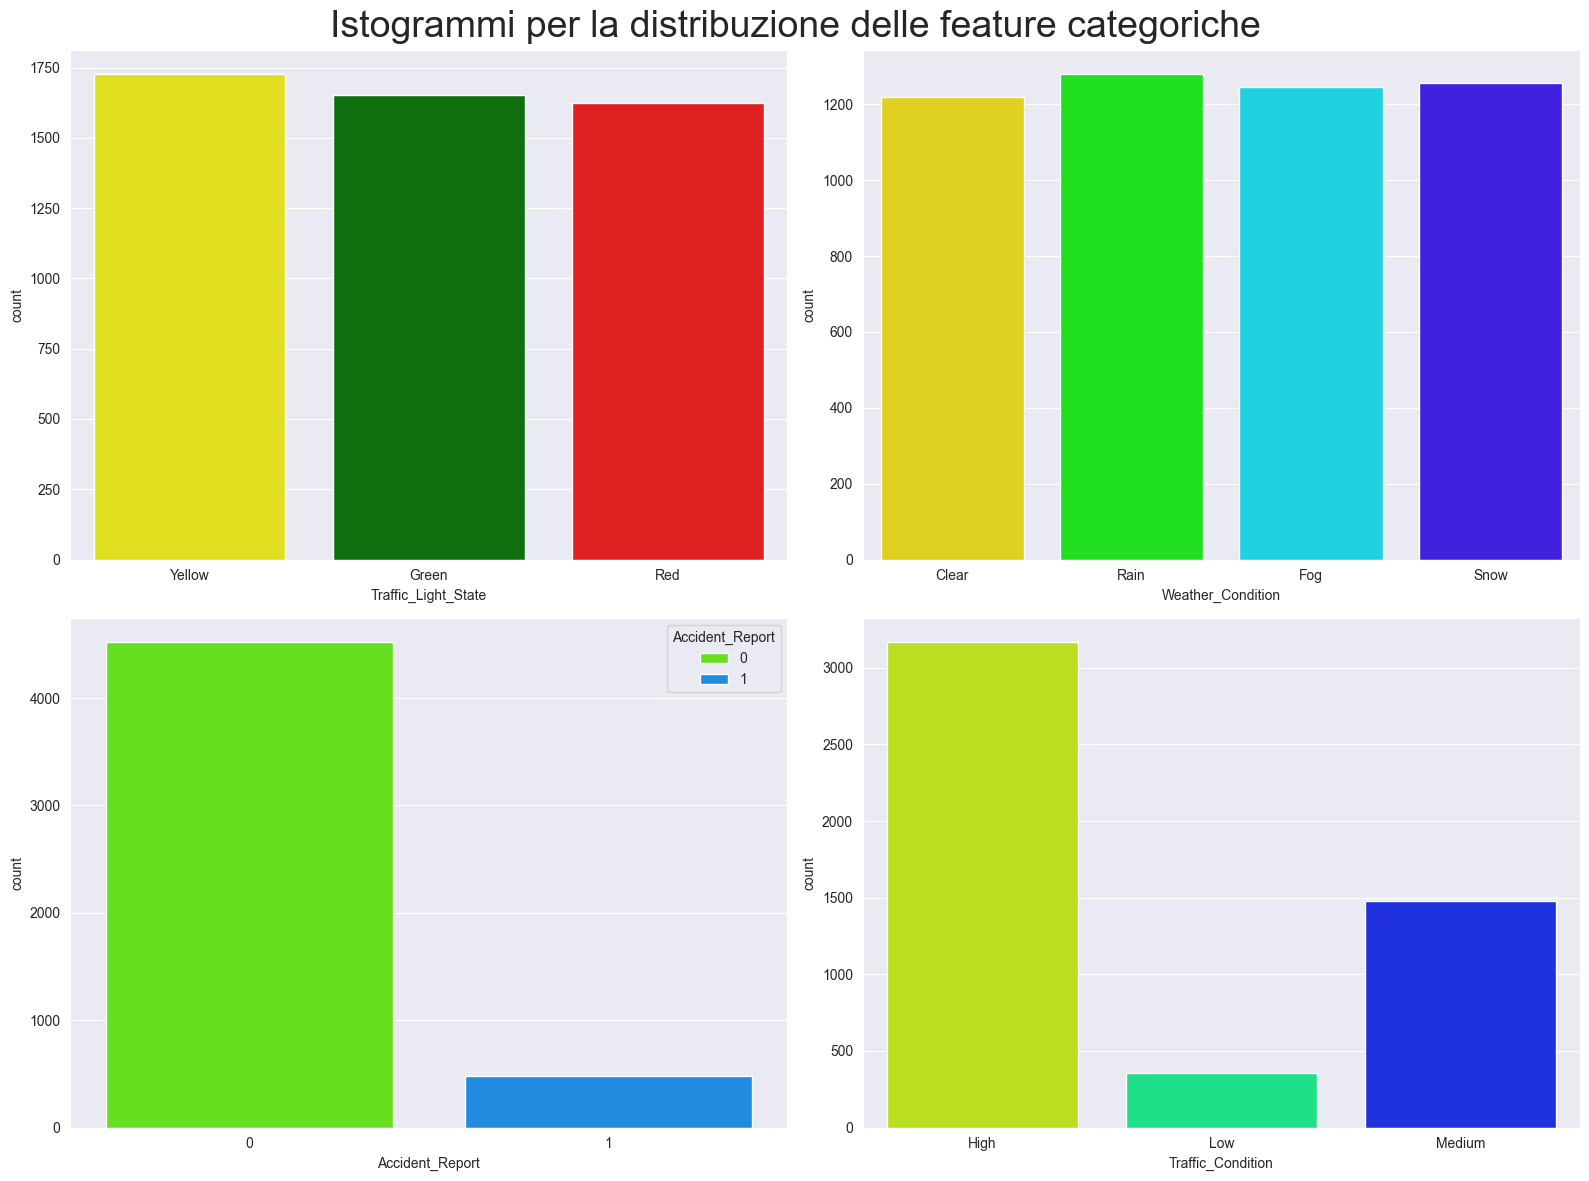

In [7]:
# Istogrammi per le features categoriche
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(data=dataset, x='Traffic_Light_State', hue='Traffic_Light_State', ax=axes[0, 0], palette={'Red': 'red', 'Yellow': 'yellow', 'Green': 'green'})
sns.countplot(data=dataset, x='Weather_Condition', hue='Weather_Condition', ax=axes[0, 1], palette='gist_rainbow')
sns.countplot(data=dataset, x='Accident_Report', hue='Accident_Report', ax=axes[1, 0], palette='gist_rainbow')
sns.countplot(data=dataset, x='Traffic_Condition', hue='Traffic_Condition', ax=axes[1, 1], palette='gist_rainbow')
plt.suptitle("Istogrammi per la distribuzione delle feature categoriche", fontsize=27)
plt.tight_layout()
plt.show()

Essendo che Accident_Report è troppo sbilanciato non può essere usata per fare previsioni appunto troppo sblianciato, e anche perchè non serve per nostro obiettivo di business, la rimuoviamo. Potremmo fare lo stesso con Traffic_Condition, ma essendo che ci è utile per laa nostra campagna di business la teniamo. Possiamo, per migliorare le predizioni del modello, bilanciare le classi della feature utilizzando SMOTE in fase di addestramento del modello.

In [8]:
dataset= dataset.drop(columns=['Accident_Report'])
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,-0.797606,3,5,364.466342,16.801459,Low


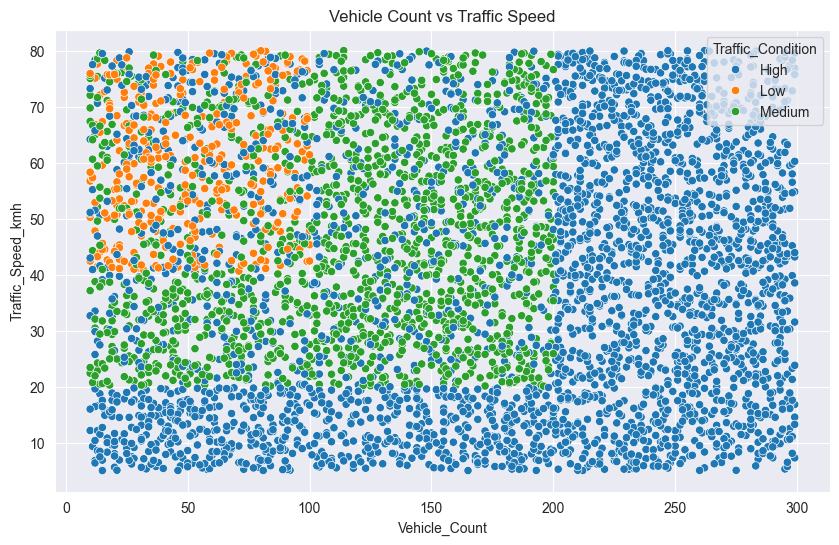

In [9]:
# Visualizziamo la correlazione tra le variabili numeriche
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Vehicle_Count', y='Traffic_Speed_kmh', hue='Traffic_Condition')
plt.title("Vehicle Count vs Traffic Speed")
plt.show()

## 2 - Preparazione dei dati

In [10]:
# cancellazione delle feature inutili per i nostri obiettivi
dataset=dataset.drop(columns=['Sentiment_Score', 'Ride_Sharing_Demand', 'Parking_Availability'], axis=1)
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,364.466342,16.801459,Low


### Label encoding
Per poter calcolare la matrice di correlazione trasformiamo le variabili categoriche in numeriche

In [11]:
# Inizializziamo il LabelEncoder
encoder = LabelEncoder()

# Applichiamo il Label Encoding alle colonne categoriche
# codifica delle categotie in ordine alfabetico ma a noi non va bene per Traffic_Condition

# Mappatura personalizzata per Traffic_Condition
traffic_condition_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Applichiamo il mapping
dataset['Traffic_Condition'] = dataset['Traffic_Condition'].map(traffic_condition_mapping)

# Applichiamo il Label Encoding per le altre colonne
columns_to_encode = ['Traffic_Light_State', 'Weather_Condition']
for col in columns_to_encode:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0


In [12]:

dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

def classify_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

dataset['Timestamp'] = dataset['Timestamp'].dt.hour.apply(classify_time)
dataset['Timestamp'] = encoder.fit_transform(dataset['Timestamp'])
dataset.rename(columns={'Timestamp': 'Time_of_Day'}, inplace=True)
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,3,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2
1,3,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2
2,3,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2
3,3,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2
4,3,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0


In [13]:
# Verifichiamo l'aggiornamento delle colonne
print(f"{dataset.dtypes}\n")

Time_of_Day                 int64
Latitude                  float64
Longitude                 float64
Vehicle_Count               int64
Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State         int64
Weather_Condition           int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Traffic_Condition           int64
dtype: object



In [14]:
df_cong = dataset[['Vehicle_Count', 'Road_Occupancy_%']].copy()

# Normalizziamo dei dati di congestione
scaler = MinMaxScaler()
df_cong[['Vehicle_Count_norm', 'Road_Occupancy_norm']] = scaler.fit_transform(df_cong)

#calcolo dell'indice di congestione
dataset['Congestion_Index'] = 0.4 * df_cong['Vehicle_Count_norm'] + 0.6 * df_cong['Road_Occupancy_norm']
dataset.head()

,Time_of_Day,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Congestion_Index
0,3,40.842275,-73.703149,205,49.893435,82.652780,2,0,450.760055,19.574337,2,0.754243
1,3,40.831119,-73.987354,202,22.383965,45.829298,0,0,321.800341,5.385554,2,0.504586
2,3,40.819549,-73.732462,252,46.889699,82.772465,0,2,231.152655,10.277477,2,0.820093
3,3,40.725849,-73.980134,37,5.730536,37.695567,1,1,410.384292,29.243279,2,0.221985
4,3,40.813265,-73.961631,64,61.348034,22.313358,1,3,364.466342,16.801459,0,0.156801


### Matrice di correlazione

Matrice di correlazione:



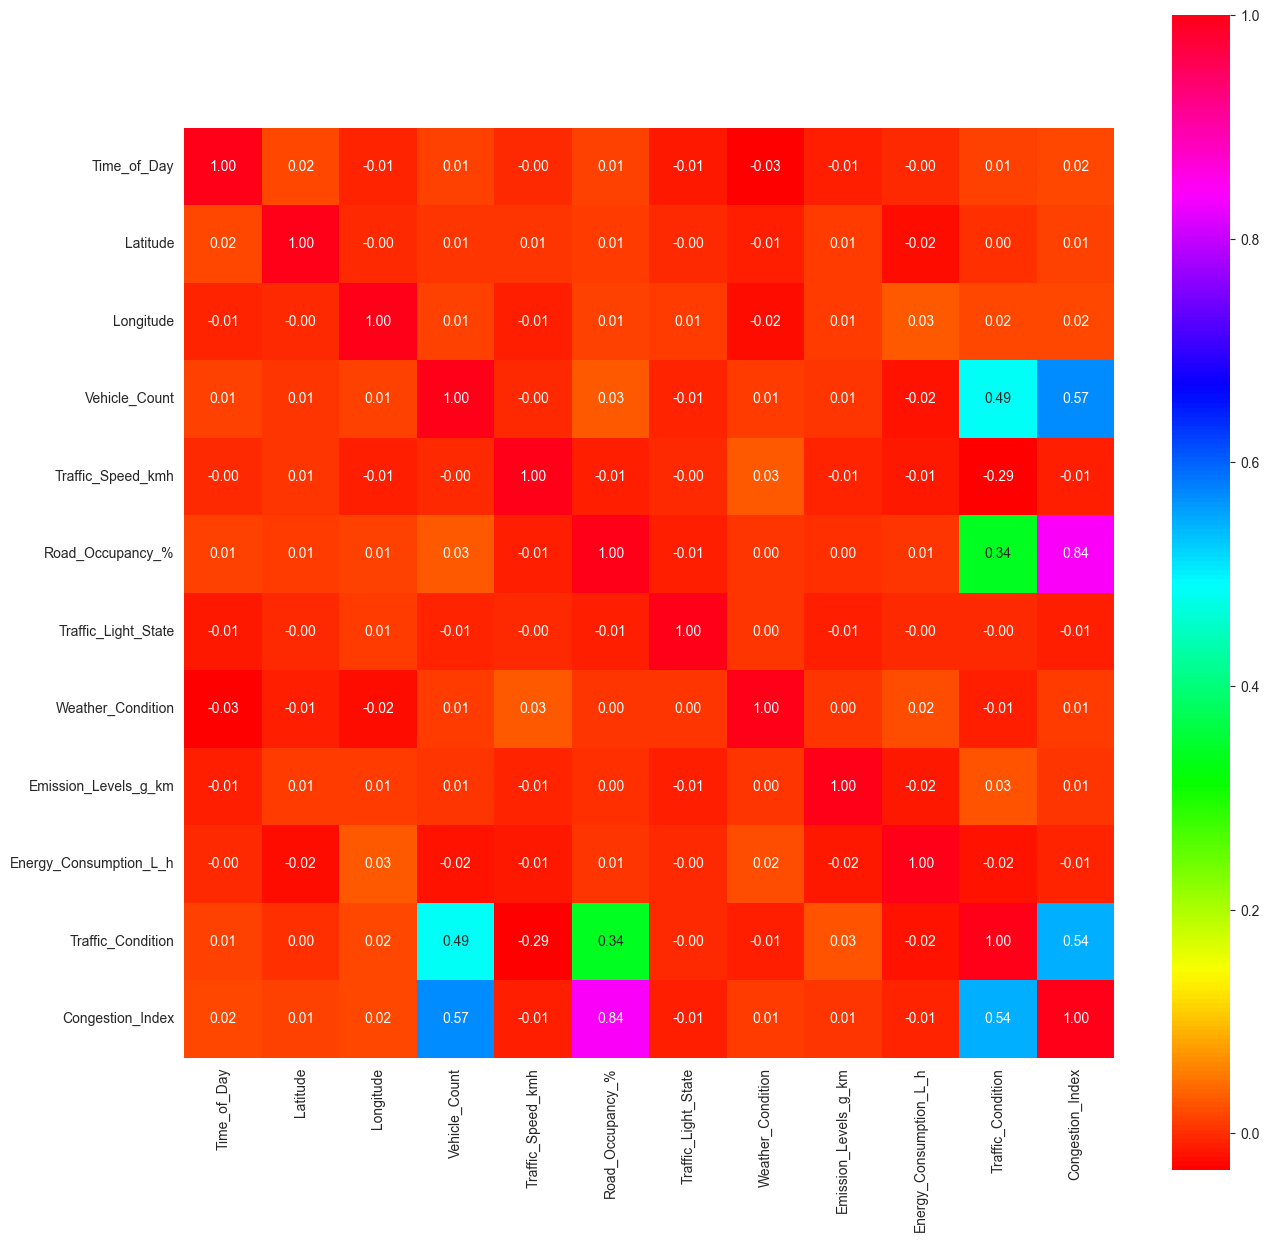

In [15]:
print('Matrice di correlazione:\n')
corr_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='hsv', robust=True)

Dalla matrice di correlazione notiamo che Road_Occupancy, Veicle_Count e Traffic_Condition sono correlate a Condegstion_Index. Congestion_Index è fortemente correlato a Road_Occupancy e Vehicle_Count, poiché è calcolato direttamente da queste variabili. Allora possiamo pensare di eliminare quella con il minor contenuto informativo, decidiamo di eliminare Road_Occupancy perchè fortemente correlata e non propriamente una misura diretta. Mantenere Vehicle_Count potrebbe essere più utile per il modello, dato che rappresenta un'informazione più diretta e meno derivata.

Matrice di correlazione:



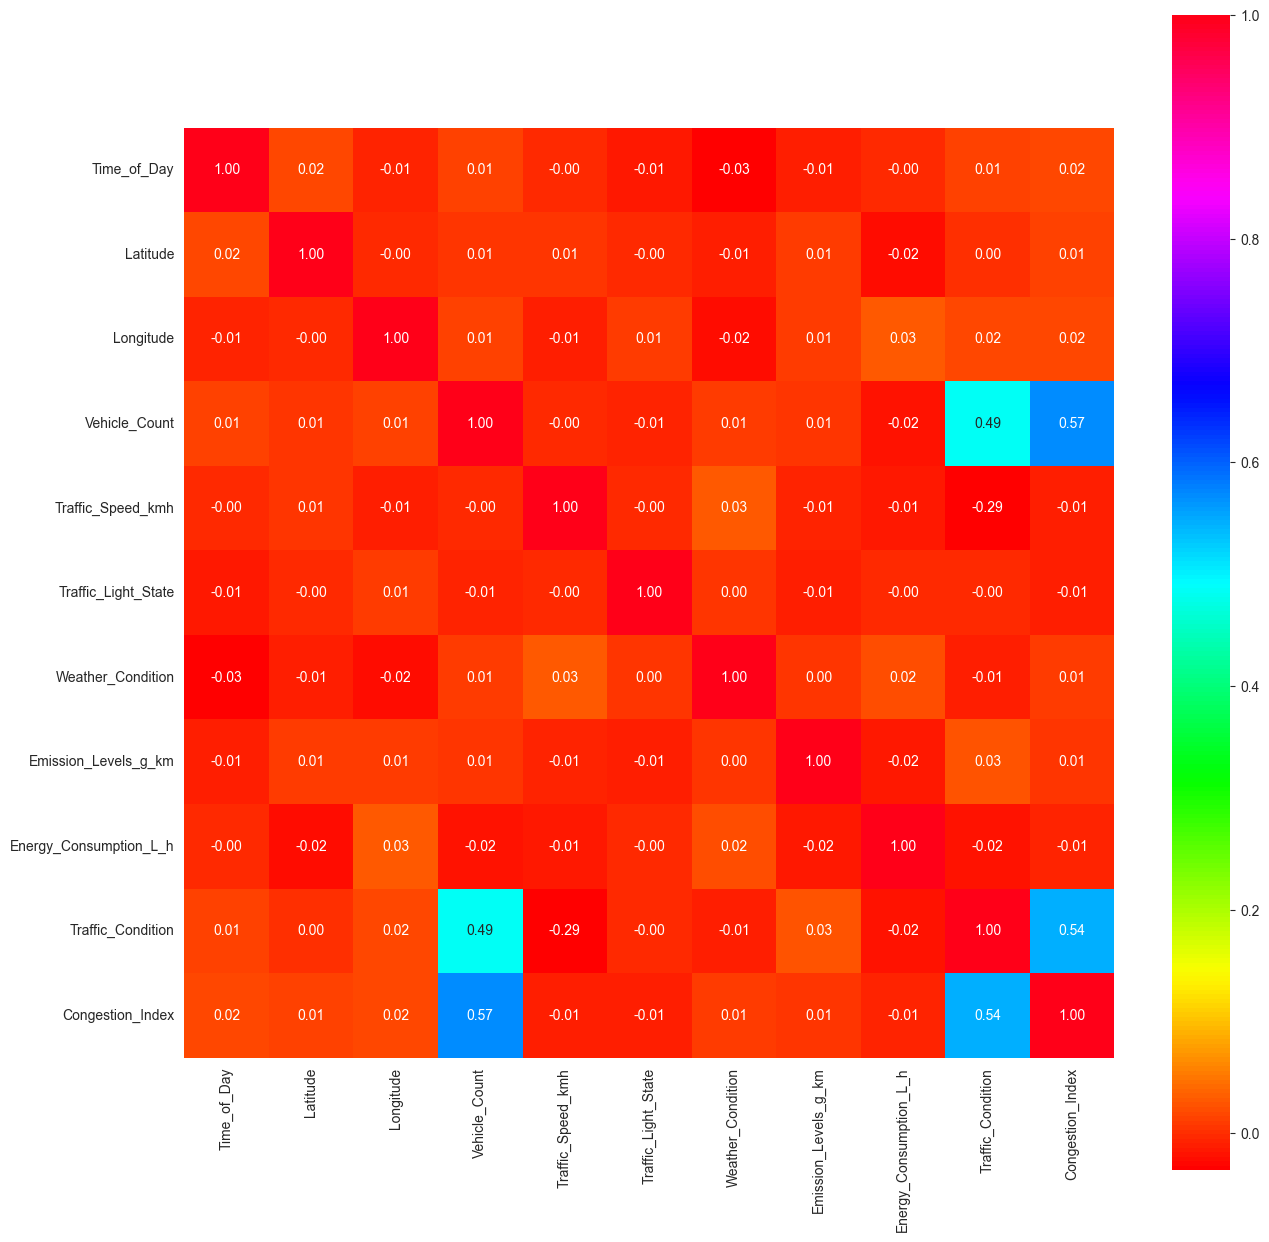

In [16]:
dataset= dataset.drop(columns=['Road_Occupancy_%'])
dataset.head()

print('Matrice di correlazione:\n')
corr_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='hsv', robust=True)

#### Analisi della matrice di correlazione
Le correlazioni non sono molto forti, ma non è  un problema.
La matrice mostra la correlazione lineare tra Traffic_Condition e Congestion_Index

- Per un **modello di regressione** le basse correlazioni potrebbero indicare che il modello lineare non sarà molto performante da solo.
- Per il **random forest** le feature debolmenti correlate vengono gestite correttamente

## 3 - CLASSIFICAZIONE DELLO STATO DEL TRAFFICO

Proviamo a fare una prima classificazione senzza applicare particolari tecniche di miglioramento del modello.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separazione delle variabili
X = dataset.drop("Traffic_Condition", axis=1)  # Tutte le colonne tranne target
y = dataset["Traffic_Condition"]  # Target

# Divisione in train, validation e test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


X_train, y_train: dati per addestrare il modello
X_val, y_val: dati per validazione (tuning iperparametri, early stopping, ecc.)
X_test, y_test: dati per valutazione finale del modello.
La validation serve per ottimizzare il modello senza guardare i dati di test, permettendo di scegliere i migliori iperparametri e prevenire overfitting.
Il test set resta "incontaminato" per una valutazione oggettiva delle performance finali.

Inizializzazione e addestramento Random Forest impostiamo un random_state per la riproducibilità essendo un modello stocastico, il risultato può variare ad ogni esecuzion

Classification Report:
              precision    recall  f1-score   support

         Low       0.84      0.93      0.88        60
      Medium       0.88      0.91      0.89       307
        High       0.96      0.93      0.94       633

    accuracy                           0.92      1000
   macro avg       0.89      0.92      0.91      1000
weighted avg       0.92      0.92      0.92      1000



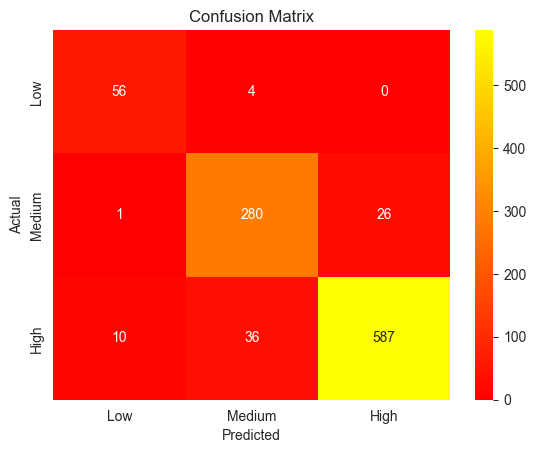

In [18]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

#Predizione e valutazione
y_pred = rf_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

#Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='autumn', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Da una prima analisi, il modello sembra buono. Ha buona precision, recall e f1-score per tutte le classi della variabile target. Anche dalla matrice di confusione vediamo che classifica abbastanza bene tutte le classi. La classe low è un pò più scarsetta rispetto alle altre, ma questo è dovuto al fatto che le classi, come abbiamo visto dai grafici, sono sblianciante e in particolare per la classe low.

### Analisi della foresta
Andiamo a calcolare alcune statistiche della foresta che il modello ha creato per capire se il modello
- è troppo complesso => troppe foglie => troppe regole per classificare => overfitting
- è troppo semplice => non coglie tutti i dettagli che dovrebbe dai dati
- ha overfittato, dovuta ad una profondità troppo elevata degli alberi => impara i dati di train

 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 18.49
- Numero medio di foglie: 229.17
- Profondità massima: 23
- Profondità minima: 16


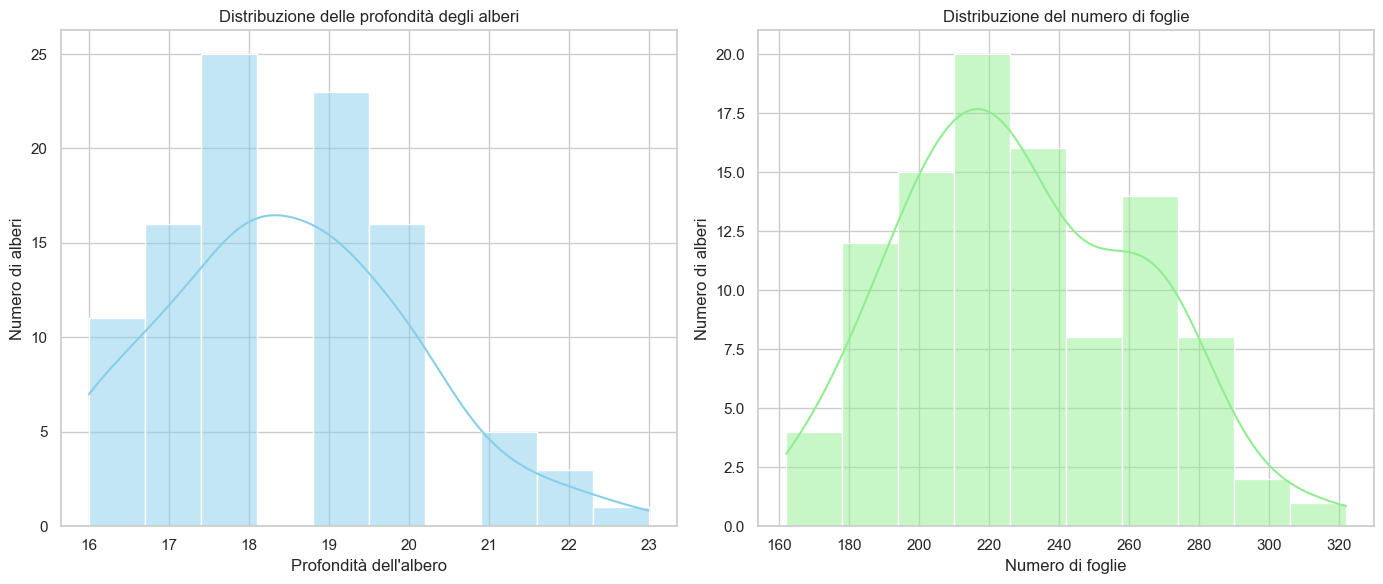

In [19]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

|--- Traffic_Speed_kmh <= 20.03
|   |--- class: 2.0
|--- Traffic_Speed_kmh >  20.03
|   |--- Weather_Condition <= 2.50
|   |   |--- Emission_Levels_g_km <= 480.18
|   |   |   |--- Congestion_Index <= 0.53
|   |   |   |   |--- Congestion_Index <= 0.26
|   |   |   |   |   |--- Traffic_Speed_kmh <= 39.42
|   |   |   |   |   |   |--- Latitude <= 40.68
|   |   |   |   |   |   |   |--- Latitude <= 40.63
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Latitude >  40.63
|   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh <= 34.86
|   |   |   |   |   |   |   |   |   |--- Latitude <= 40.67
|   |   |   |   |   |   |   |   |   |   |--- Vehicle_Count <= 84.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- Vehicle_Count >  84.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |--- Latitude >  40.67
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   | 

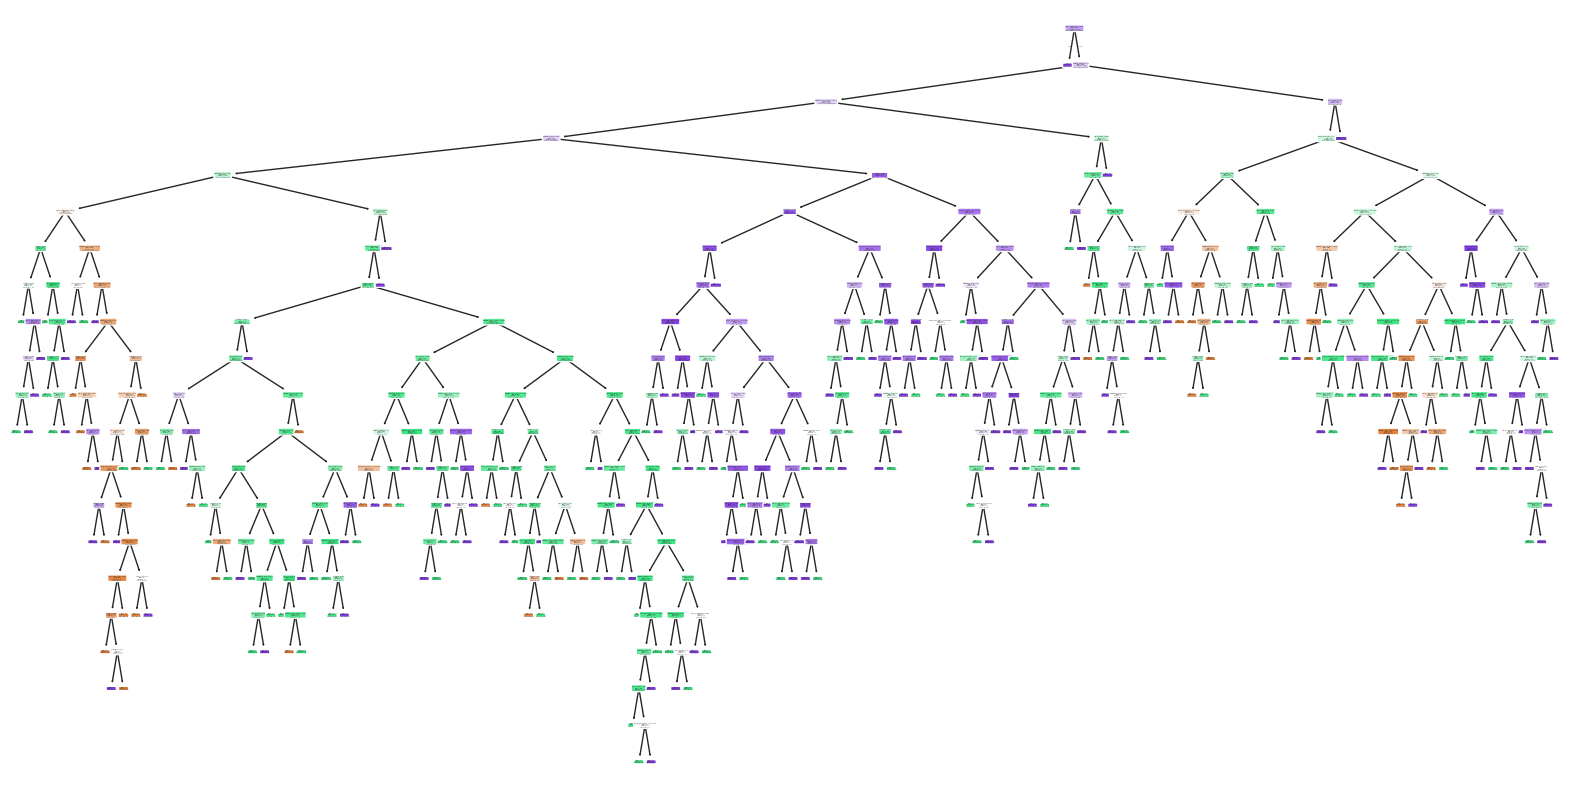

In [20]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

tree = rf_clf.estimators_[0]
print(export_text(tree, feature_names=list(X.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()


Già delle statistiche possiamo vedere, che è andato in overfitting... troppe foglie, eccessiva profondità, ma per avere la certezza assoluta, valutiamo l'accuratezza tra train e test set.
Se accurancy_train>>accurancy_test => overfitting

In [21]:
print("Train accuracy:", rf_clf.score(X_train, y_train))
print("Test accuracy:", rf_clf.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.923


Vuol dire che il modello ha imparato perfettamente i dati di training, ma quando lo applichiamo a dati mai visti prima l’accuratezza scende a 0.923.

=> il modello è troppo complesso, ha “memorizzato” i dati di training e non generalizza  bene su dati nuovi.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

cv_scores = cross_val_score(rf_clf, X, y, cv=kfold)
print(f"Cross-Validation Accuracy: {cv_scores}")
print(f'Precisione media: {cv_scores.mean():.2%}')
print(f'Deviazione standard: {cv_scores.std():.2%}')

Cross-Validation Accuracy: [0.942 0.94  0.954 0.928 0.936 0.93  0.934 0.94  0.924 0.938]
Precisione media: 93.66%
Deviazione standard: 0.80%


Il modello generalizza bene, dando performance stabili e affidabili su diversi subset del dataset.
MA... il problema è che va in overfitting, e le metriche sulla classe low sono scarsette per via del fatto che ha pochi data point.

### MIGLIORAMENTO 1
Cerchiamo di ridurre l'overfitting andando a
1. fare **feature importance** => riduciamo le feature => riduciamo la dimensionalià dell'albero
2. **SMOTE** per bilanciare le classi minoritarie


              precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.86      0.93      0.89       307
           2       0.96      0.92      0.94       633

    accuracy                           0.92      1000
   macro avg       0.89      0.92      0.90      1000
weighted avg       0.92      0.92      0.92      1000



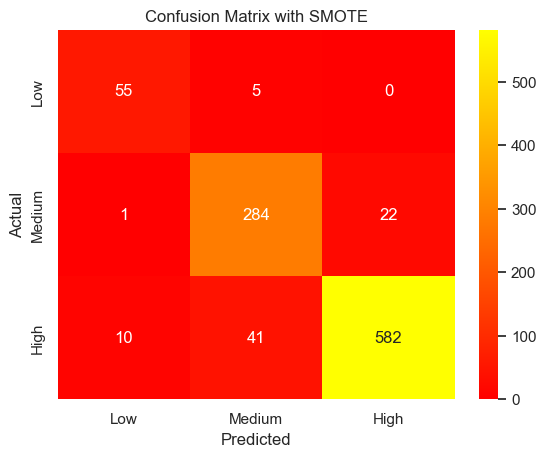

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_cfl_smote = RandomForestClassifier()
rf_cfl_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_cfl_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

#Matrice di confusione
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='autumn', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with SMOTE")
plt.show()

 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 18.49
- Numero medio di foglie: 229.17
- Profondità massima: 23
- Profondità minima: 16


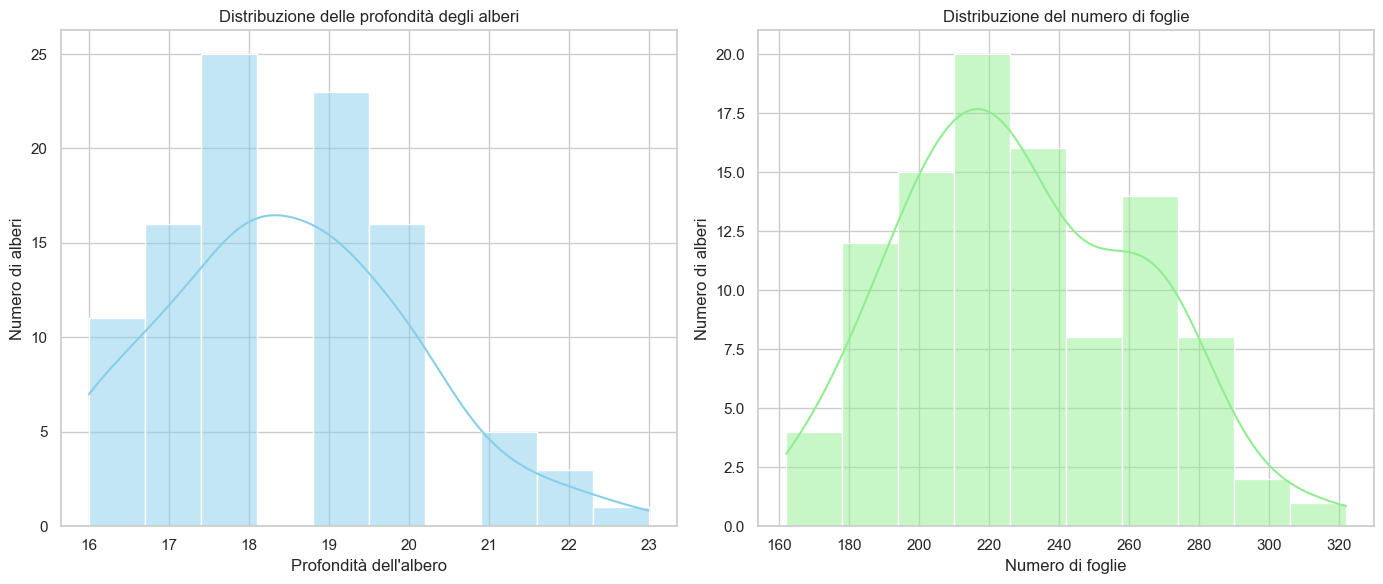

In [24]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

|--- Time_of_Day <= 2.50
|   |--- Weather_Condition <= 2.50
|   |   |--- Traffic_Speed_kmh <= 41.19
|   |   |   |--- Vehicle_Count <= 200.50
|   |   |   |   |--- Vehicle_Count <= 109.50
|   |   |   |   |   |--- Longitude <= -73.95
|   |   |   |   |   |   |--- Latitude <= 40.82
|   |   |   |   |   |   |   |--- Traffic_Light_State <= 1.50
|   |   |   |   |   |   |   |   |--- Congestion_Index <= 0.54
|   |   |   |   |   |   |   |   |   |--- Longitude <= -73.99
|   |   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh <= 20.45
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh >  20.45
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- Longitude >  -73.99
|   |   |   |   |   |   |   |   |   |   |--- Time_of_Day <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Time_of_Day >  0.50
|   | 

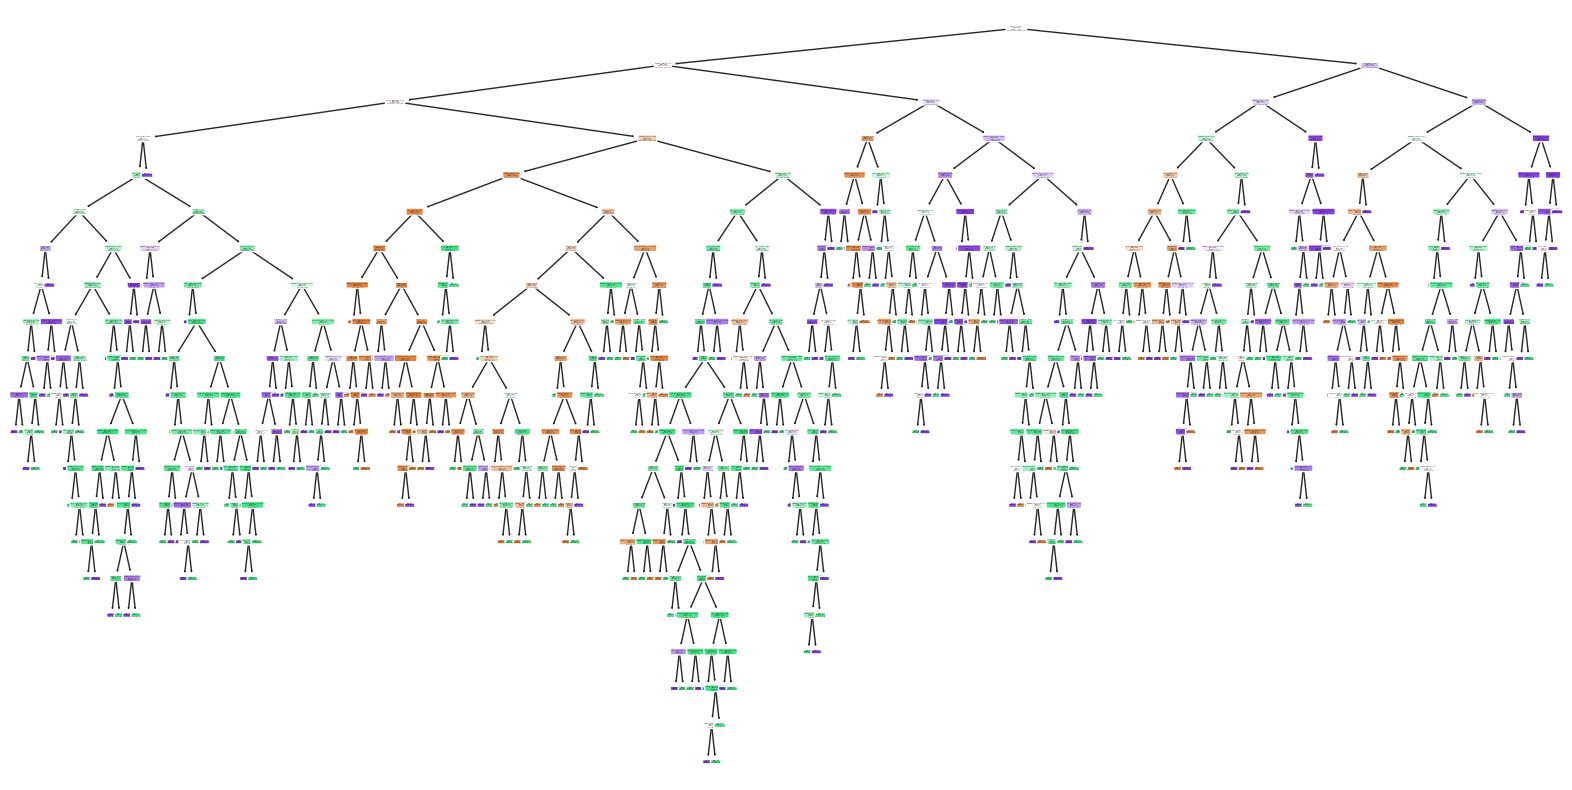

In [25]:
tree = rf_cfl_smote.estimators_[0]
print(export_text(tree, feature_names=list(X.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [26]:
print("Train accuracy:", rf_cfl_smote.score(X_train, y_train))
print("Test accuracy:", rf_cfl_smote.score(X_test, y_test))

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

cv_scores = cross_val_score(rf_cfl_smote, X, y, cv=kfold)
print(f"Cross-Validation Accuracy: {cv_scores}")
print(f'Precisione media: {cv_scores.mean():.2%}')
print(f'Deviazione standard: {cv_scores.std():.2%}')

Train accuracy: 1.0
Test accuracy: 0.921
Cross-Validation Accuracy: [0.944 0.938 0.954 0.932 0.936 0.924 0.93  0.938 0.934 0.934]
Precisione media: 93.64%
Deviazione standard: 0.77%


FEATURE IMPORTANCE + SMOTE

                  Feature  Importance
3           Vehicle_Count    0.328536
9        Congestion_Index    0.256819
4       Traffic_Speed_kmh    0.230658
7    Emission_Levels_g_km    0.037833
8  Energy_Consumption_L_h    0.037293
2               Longitude    0.037218
1                Latitude    0.037063
6       Weather_Condition    0.013116
0             Time_of_Day    0.012537
5     Traffic_Light_State    0.008926


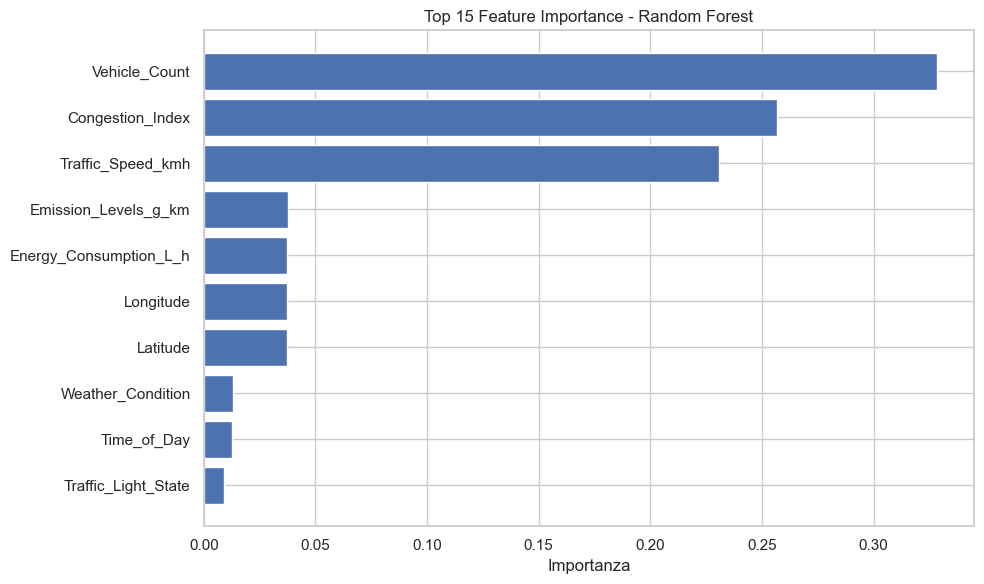

In [27]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns 

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

print(feat_imp.head(10))

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:15][::-1], feat_imp['Importance'][:15][::-1])
plt.xlabel("Importanza")
plt.title("Top 15 Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

Usaimo RFE per selezionrea le feature più rilevanti in modo iterativo, allenando il modello e rimuovendo le meno importanti ad ogni ciclo.

In [28]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=rf_clf, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Feature selezionate da RFE:")
print(selected_features)

# Riduciamo il dataset
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

Feature selezionate da RFE:
Index(['Vehicle_Count', 'Traffic_Speed_kmh', 'Congestion_Index'], dtype='object')


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.89      0.94      0.92       307
           2       0.97      0.94      0.95       633

    accuracy                           0.94      1000
   macro avg       0.91      0.94      0.92      1000
weighted avg       0.94      0.94      0.94      1000

Accuracy: 0.937


<Axes: >

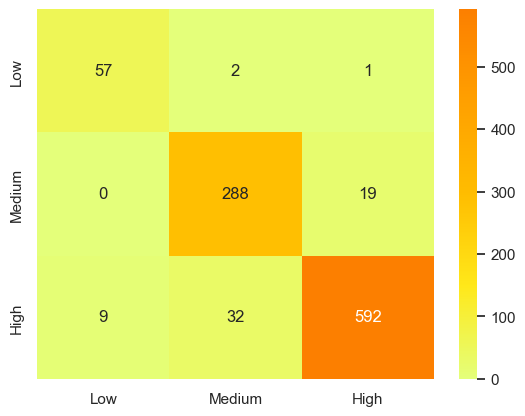

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# training con le feature selezionate
rf_clf_rfe = RandomForestClassifier(random_state=42)
rf_clf_rfe.fit(X_train_rfe, y_train)


y_pred_rfe= rf_clf_rfe.predict(X_test_rfe)
print(classification_report(y_test, y_pred_rfe))
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))

cm_rfe = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(cm_rfe, annot=True, fmt='d', cmap='Wistia', 
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])


 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 20.08
- Numero medio di foglie: 227.42
- Profondità massima: 26
- Profondità minima: 16


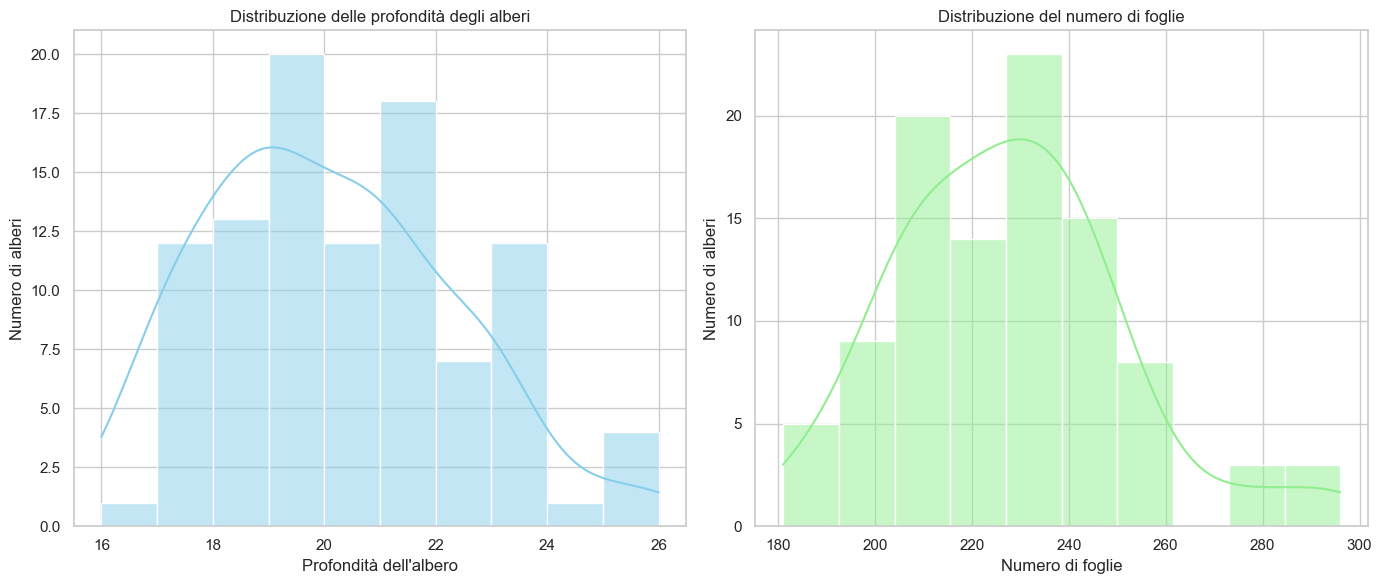

In [30]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf_rfe.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf_rfe.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf_rfe.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

|--- Vehicle_Count <= 200.50
|   |--- Traffic_Speed_kmh <= 20.03
|   |   |--- class: 2.0
|   |--- Traffic_Speed_kmh >  20.03
|   |   |--- Congestion_Index <= 0.55
|   |   |   |--- Congestion_Index <= 0.26
|   |   |   |   |--- Congestion_Index <= 0.14
|   |   |   |   |   |--- Vehicle_Count <= 67.00
|   |   |   |   |   |   |--- Vehicle_Count <= 59.00
|   |   |   |   |   |   |   |--- Vehicle_Count <= 44.50
|   |   |   |   |   |   |   |   |--- Congestion_Index <= 0.13
|   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh <= 39.10
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh >  39.10
|   |   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh <= 69.42
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh >  69.42
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |--- Cong

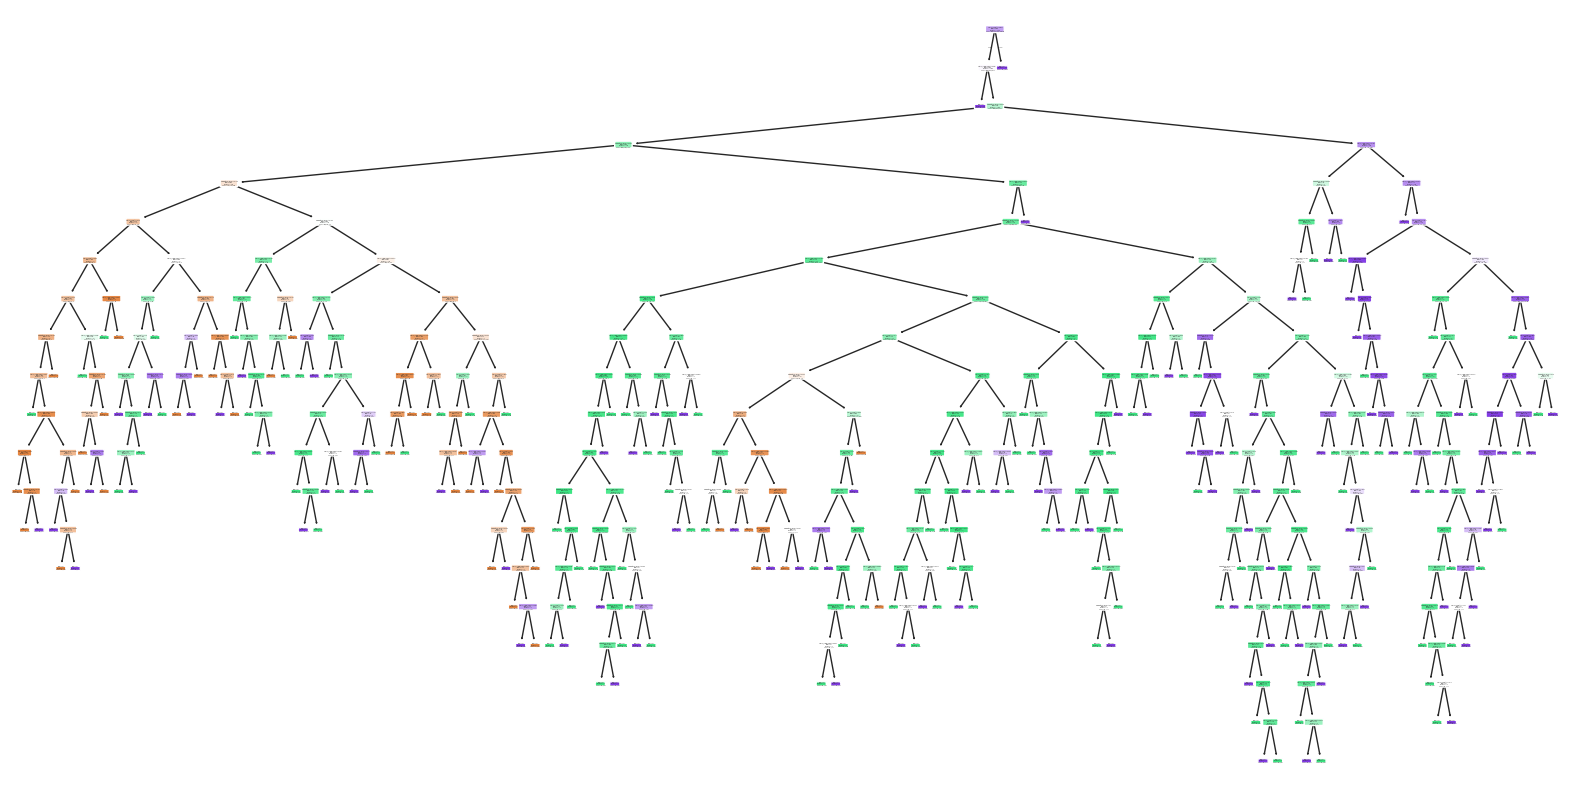

In [31]:
tree_rfe = rf_clf_rfe.estimators_[0]
print(export_text(tree_rfe, feature_names=list(X_train_rfe.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree_rfe, feature_names=X_train_rfe.columns, filled=True, rounded=True)
plt.show()

In [32]:
print("Train accuracy:", rf_clf_rfe.score(X_train_rfe, y_train))
print("Test accuracy:", rf_clf_rfe.score(X_test_rfe, y_test))

Train accuracy: 1.0
Test accuracy: 0.937


Proviamo SMOTE sulle feature selected, il modello va ancora in overfitting. :|

In [33]:
# Applichiamo SMOTE solo sulle feature selezionate da RFE
X_train_rfe_smote, y_train_rfe_smote = SMOTE(random_state=42).fit_resample(X_train_rfe, y_train)

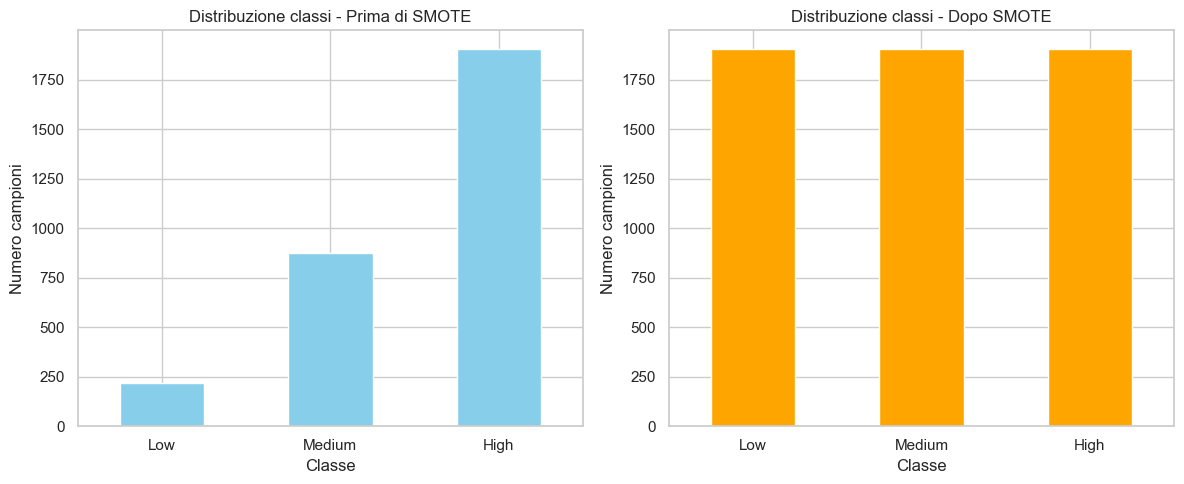

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prima di SMOTE
y_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribuzione classi - Prima di SMOTE')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Numero campioni')
axes[0].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)

# Dopo SMOTE
y_train_rfe_smote.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Distribuzione classi - Dopo SMOTE')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Numero campioni')
axes[1].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        60
           1       0.89      0.96      0.93       307
           2       0.98      0.93      0.96       633

    accuracy                           0.94      1000
   macro avg       0.90      0.96      0.93      1000
weighted avg       0.95      0.94      0.94      1000

Accuracy: 0.943


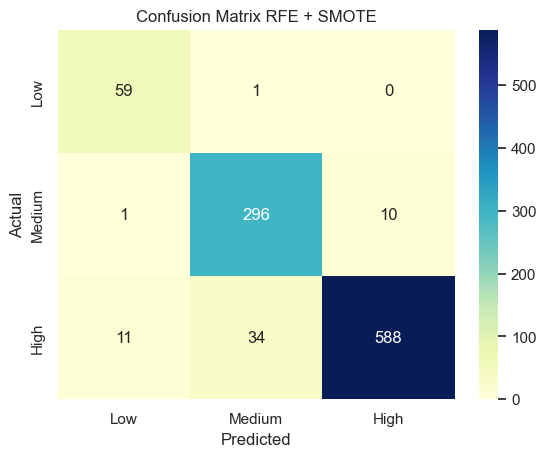

In [35]:
# Alleniamo il modello Random Forest sulle feature selezionate e dati bilanciati
rf_clf_rfe_smote = RandomForestClassifier(random_state=42)
rf_clf_rfe_smote.fit(X_train_rfe_smote, y_train_rfe_smote)

# Predizione e valutazione
y_pred_rfe_smote = rf_clf_rfe_smote.predict(X_test_rfe)
print(classification_report(y_test, y_pred_rfe_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_rfe_smote))

cm_rfe_smote = confusion_matrix(y_test, y_pred_rfe_smote)
sns.heatmap(cm_rfe_smote, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFE + SMOTE")
plt.show()

Analisi della Random Forest (RFE + SMOTE):
- Numero di alberi: 100
- Profondità media: 21.10
- Numero medio di foglie: 296.25
- Profondità massima: 28
- Profondità minima: 16


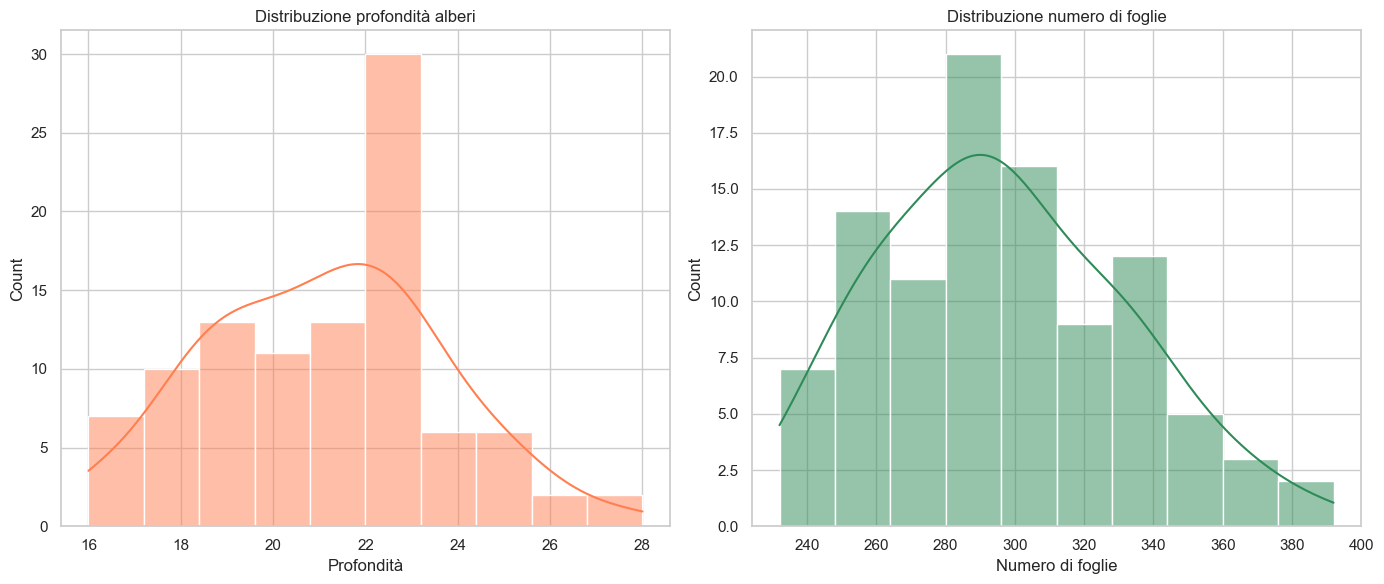

In [36]:
# Analisi struttura della foresta
depths = [tree.get_depth() for tree in rf_clf_rfe_smote.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf_rfe_smote.estimators_]

print("Analisi della Random Forest (RFE + SMOTE):")
print(f"- Numero di alberi: {len(rf_clf_rfe_smote.estimators_)}")
print(f"- Profondità media: {sum(depths)/len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves)/len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Plot distribuzioni
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="coral")
plt.title("Distribuzione profondità alberi")
plt.xlabel("Profondità")

plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="seagreen")
plt.title("Distribuzione numero di foglie")
plt.xlabel("Numero di foglie")

plt.tight_layout()
plt.show()


|--- Vehicle_Count <= 100.50
|   |--- Traffic_Speed_kmh <= 41.03
|   |   |--- Congestion_Index <= 0.53
|   |   |   |--- Congestion_Index <= 0.46
|   |   |   |   |--- Congestion_Index <= 0.42
|   |   |   |   |   |--- Vehicle_Count <= 94.00
|   |   |   |   |   |   |--- Vehicle_Count <= 89.50
|   |   |   |   |   |   |   |--- Vehicle_Count <= 71.50
|   |   |   |   |   |   |   |   |--- Congestion_Index <= 0.35
|   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh <= 20.03
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh >  20.03
|   |   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh <= 40.78
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- Traffic_Speed_kmh >  40.78
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Congestion_Index >  0.35
|   |   |   |   |   |   |   |   |   |--- Congestion_Inde

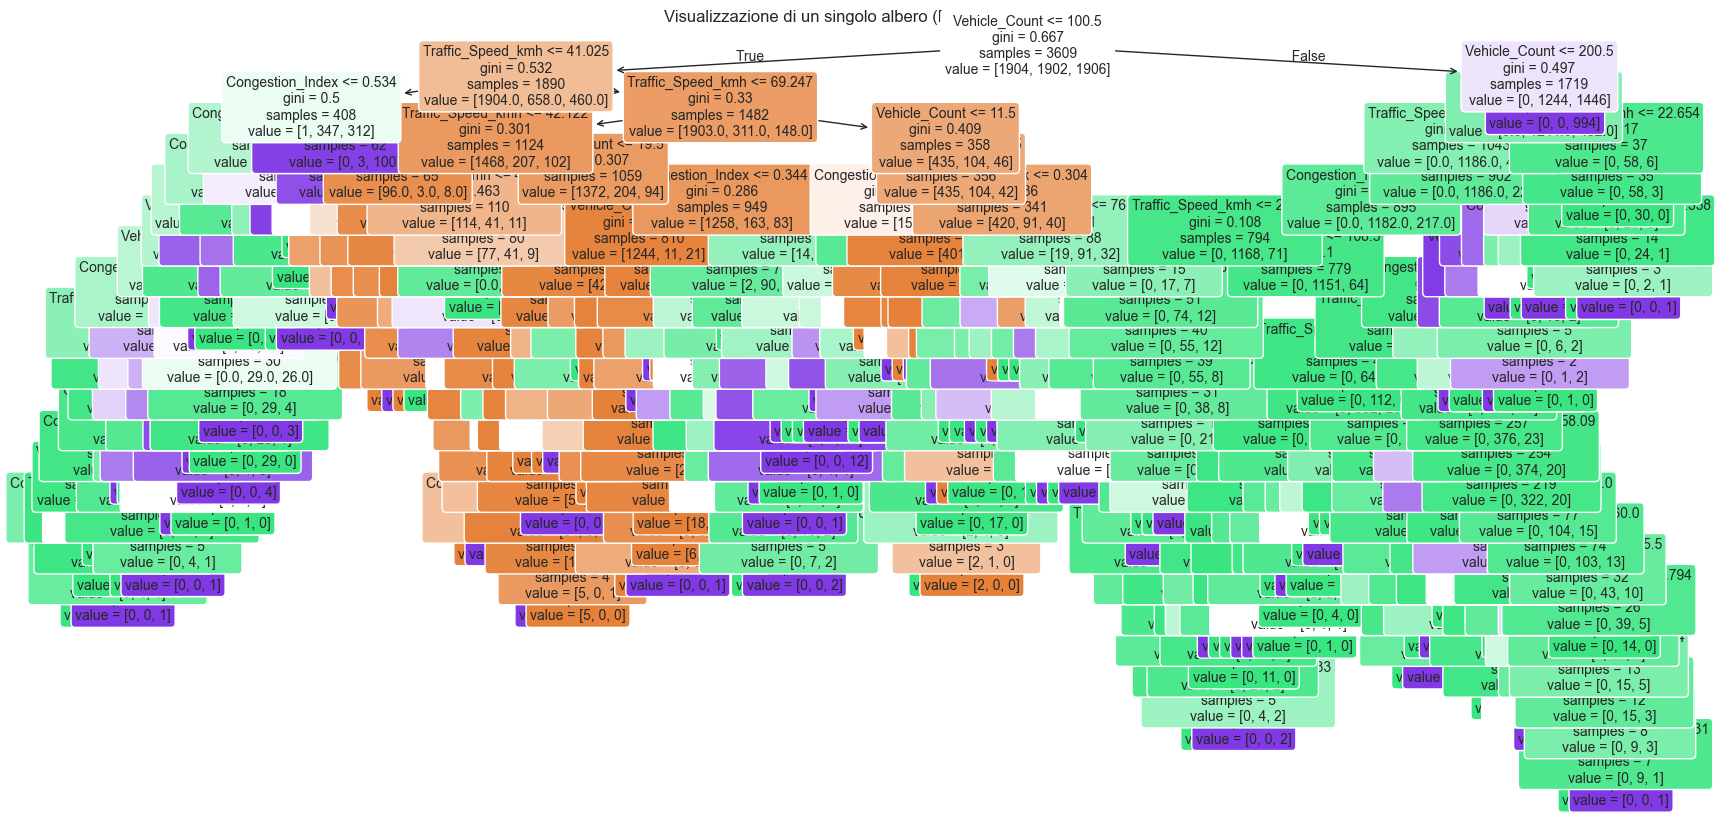

In [37]:

tree_rfe_smote = rf_clf_rfe_smote.estimators_[0] 

print(export_text(tree_rfe_smote, feature_names=list(X_train_rfe_smote.columns)))

plt.figure(figsize=(20,10))
plot_tree(tree_rfe_smote, feature_names=X_train_rfe_smote.columns,
          filled=True, rounded=True, fontsize=10)
plt.title("Visualizzazione di un singolo albero (RFE + SMOTE)")
plt.show()

In [38]:
print("Train Accuracy:", rf_clf_rfe_smote.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", rf_clf_rfe_smote.score(X_test_rfe, y_test))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_clf_rfe_smote, X_train_rfe_smote, y_train_rfe_smote, cv=kfold)

print("\nK-Fold Cross Validation Results:")
print(f"- Accuracy per fold: {cv_scores}")
print(f"- Accuracy media: {cv_scores.mean():.2%}")
print(f"- Deviazione standard: {cv_scores.std():.2%}")

Train Accuracy: 1.0
Test Accuracy: 0.943

K-Fold Cross Validation Results:
- Accuracy per fold: [0.96678322 0.95979021 0.97723292 0.98248687 0.97022767 0.97022767
 0.97898424 0.97022767 0.97197898 0.97723292]
- Accuracy media: 97.25%
- Deviazione standard: 0.63%


ANCORA!!!

In [39]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Definizione spazio iperparametri
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# StratifiedKFold per validazione
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Esecuzione del tuning
rf_random_search.fit(X_train_rfe_smote, y_train_rfe_smote)

# Migliori parametri trovati
print("Best Parameters:", rf_random_search.best_params_)
print("Best CV Score:", rf_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 16, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 185}
Best CV Score: 0.9751402353164698


Train Accuracy (SMOTE): 0.9798669467787114
Test Accuracy: 0.947
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        60
           1       0.90      0.97      0.93       307
           2       0.99      0.93      0.96       633

    accuracy                           0.95      1000
   macro avg       0.91      0.96      0.93      1000
weighted avg       0.95      0.95      0.95      1000



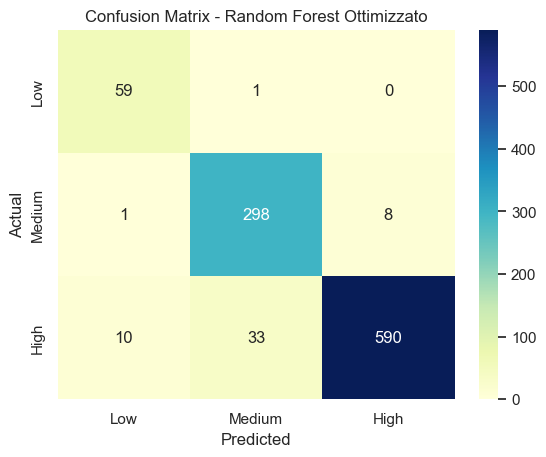

In [40]:
# Modello ottimizzato
best_rf = rf_random_search.best_estimator_

# Accuracy su training (SMOTE) e test
print("Train Accuracy (SMOTE):", best_rf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", best_rf.score(X_test_rfe, y_test))

# Report dettagliato
y_pred_test_opt = best_rf.predict(X_test_rfe)
print(classification_report(y_test, y_pred_test_opt))

# Confusion matrix
cm_opt = confusion_matrix(y_test, y_pred_test_opt)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Ottimizzato")
plt.show()

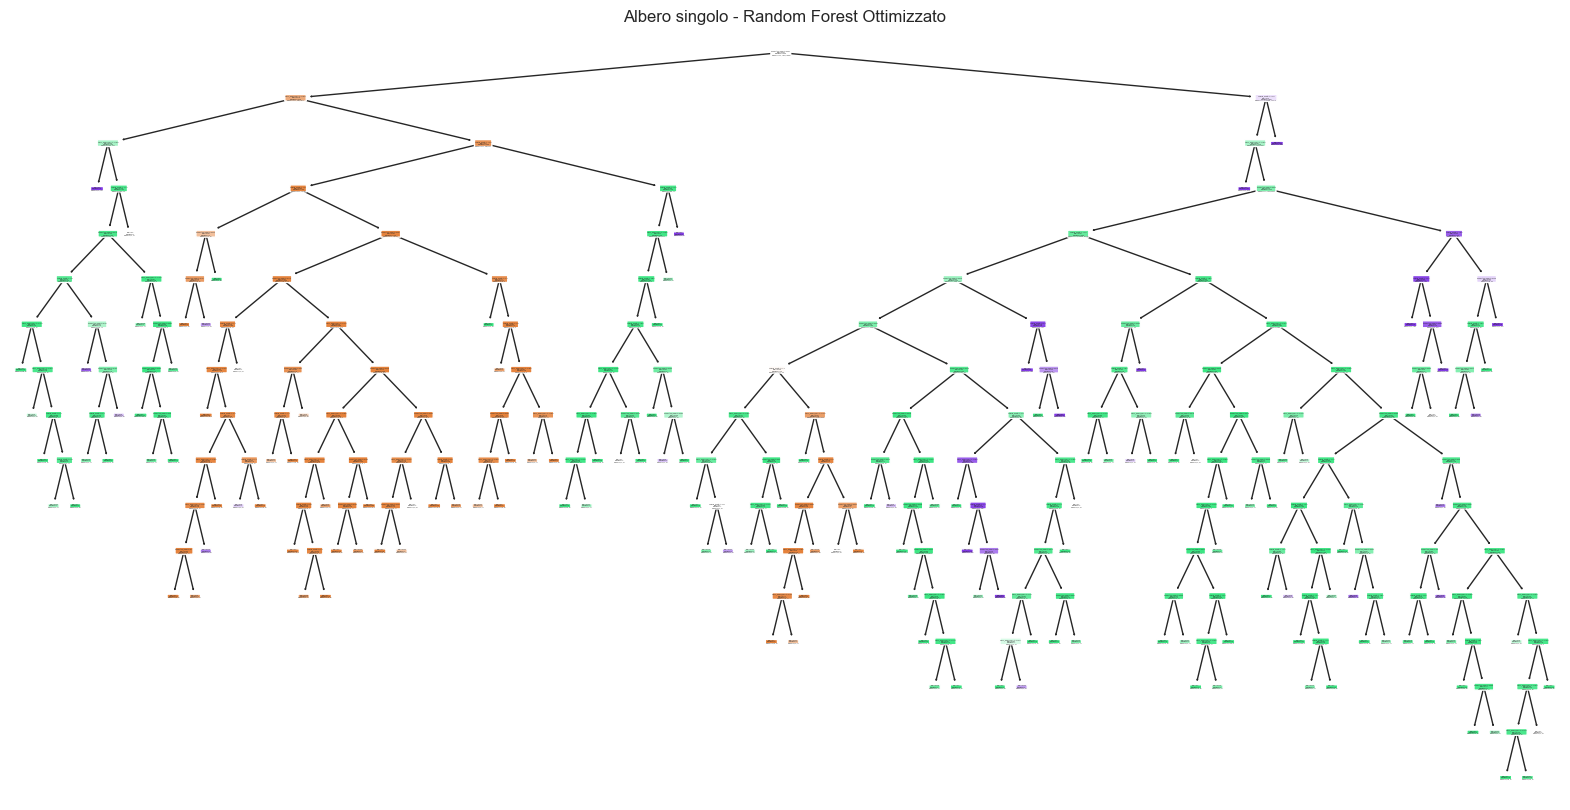

In [41]:
tree_opt = best_rf.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree_opt, feature_names=X_train_rfe_smote.columns, filled=True, rounded=True)
plt.title("Albero singolo - Random Forest Ottimizzato")
plt.show()


### CURVA AUC-ROC
La curva ROC AUC multiclasse è utile per visualizzare come il modello distingue tra ciascuna classe (Low, Medium, High).  La curva ROC AUC si calcola esclusivamente sui dati di test.

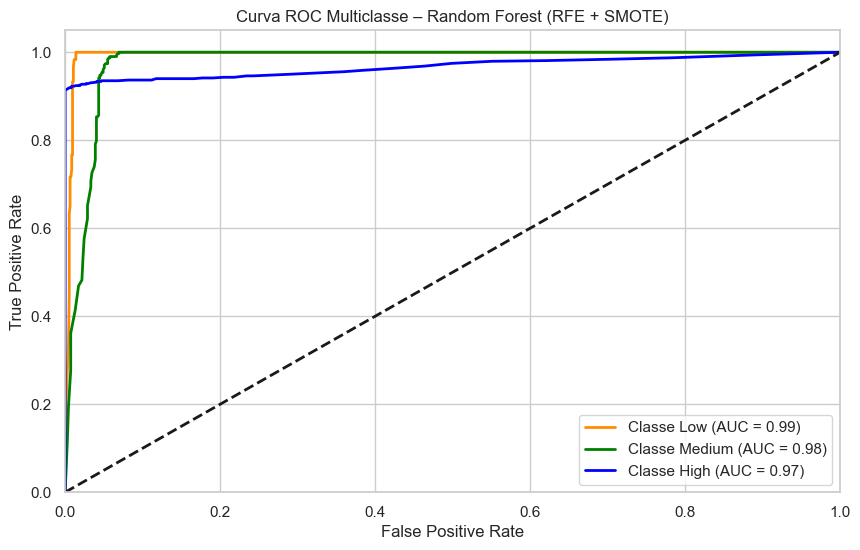

In [42]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarizza le etichette reali del test set (3 classi)
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Predizione probabilità con il modello addestrato su SMOTE + RFE
y_score = rf_clf_rfe_smote.predict_proba(X_test_rfe)  

# Calcolo ROC per ogni classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colori e nomi classi per il grafico
colors = cycle(['darkorange', 'green', 'blue'])
class_names = ['Low', 'Medium', 'High']

# Plot della curva ROC multiclass
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse – Random Forest (RFE + SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Un valore di AUC (Area Under the Curve) rappresenta la capacità di un modello di classificazione di distinguere tra le classi. In particolare, un AUC di 1.0 indica un modello perfetto. Nel nostro caso:

AUC = 0.99 per la classe Low → il modello distingue quasi perfettamente tra "Low" e le altre classi.

AUC = 0.98 per la classe Medium → il modello è in grado di distinguere quasi sempre la classe Medium dalle altre classi.

AUC = 0.97 per la classe High → il modello ha un'ottima capacità di distinguere High, ma non perfetta come nel caso di AUC = 1.

L'AUC per ogni classe nel nostro caso è molto vicino al valore massimo di 1, il che indica che il modello sta facendo un ottimo lavoro nel classificare i dati.

### Predizione su nuovi dati

In [43]:
# Dizionario etichette
etichetta = {0: "Low", 1: "Medium", 2: "High"}

# Esempi di nuovi dati (uno per stato)
nuovi_dati = pd.DataFrame([
    {'Traffic_Speed_kmh': 60.0, 'Vehicle_Count': 20, 'Congestion_Index': 0.10},
    {'Traffic_Speed_kmh': 40.0, 'Vehicle_Count': 80, 'Congestion_Index': 0.45},
    {'Traffic_Speed_kmh': 20.0, 'Vehicle_Count': 120, 'Congestion_Index': 0.65}
])

nuovi_dati = nuovi_dati[['Vehicle_Count', 'Traffic_Speed_kmh', 'Congestion_Index']]

# Predizione e probabilità per ogni riga
for i, row in nuovi_dati.iterrows():
    input_df = pd.DataFrame([row])
    prediction = best_rf.predict(input_df)[0]
    probs = best_rf.predict_proba(input_df)[0]
    stato_traffico = etichetta[prediction]

    print("Dati in ingresso:", dict(row))
    print("Stato del traffico previsto:", stato_traffico)
    print("Probabilità:")
    for j, p in enumerate(probs):
        print(f" - {etichetta[j]}: {p:.2%}")

Dati in ingresso: {'Vehicle_Count': np.float64(20.0), 'Traffic_Speed_kmh': np.float64(60.0), 'Congestion_Index': np.float64(0.1)}
Stato del traffico previsto: Low
Probabilità:
 - Low: 95.27%
 - Medium: 0.00%
 - High: 4.73%
Dati in ingresso: {'Vehicle_Count': np.float64(80.0), 'Traffic_Speed_kmh': np.float64(40.0), 'Congestion_Index': np.float64(0.45)}
Stato del traffico previsto: Medium
Probabilità:
 - Low: 0.18%
 - Medium: 93.00%
 - High: 6.82%
Dati in ingresso: {'Vehicle_Count': np.float64(120.0), 'Traffic_Speed_kmh': np.float64(20.0), 'Congestion_Index': np.float64(0.65)}
Stato del traffico previsto: High
Probabilità:
 - Low: 0.00%
 - Medium: 2.45%
 - High: 97.55%


### Confronto con altri modelli

=== RANDOM FOREST ===
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        60
           1       0.90      0.97      0.93       307
           2       0.99      0.93      0.96       633

    accuracy                           0.95      1000
   macro avg       0.91      0.96      0.93      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy: 0.947

=== SVM ===
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        60
           1       0.71      0.75      0.73       307
           2       0.98      0.76      0.85       633

    accuracy                           0.77      1000
   macro avg       0.67      0.84      0.69      1000
weighted avg       0.86      0.77      0.79      1000

Accuracy: 0.769

=== KNN ===
              precision    recall  f1-score   support

           0       0.34      0.82      0.48        60
           1       0.68      0.78      0.73      

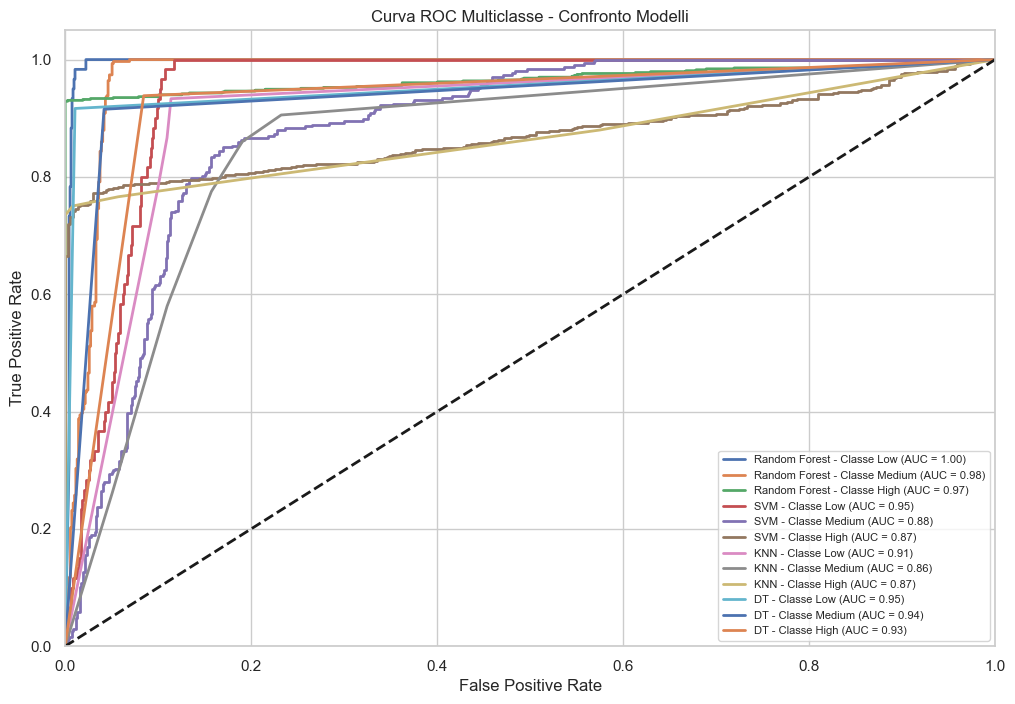

In [44]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import label_binarize


# === DECISION TREE ===

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_dt = dt_clf.predict(X_test_rfe)


# === SVM ===
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_svm = svm_clf.predict(X_test_rfe)

# === KNN ===
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_knn = knn_clf.predict(X_test_rfe)

        
# === Report e Accuracy ===
print("=== RANDOM FOREST ===")
y_pred_test_opt = best_rf.predict(X_test_rfe)
print(classification_report(y_test, y_pred_test_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_test_opt))

print("\n=== SVM ===")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\n=== KNN ===")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

print("\n=== DECISION TREE ===")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


# === ROC curve per modelli supervisionati ===

models = {
    'Random Forest': best_rf,
    'SVM': svm_clf,
    'KNN': knn_clf,
    'DT': dt_clf
}

y_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_bin.shape[1]
colors = cycle(['darkorange', 'green', 'blue'])
class_names = ['Low', 'Medium', 'High']

plt.figure(figsize=(12,8))

for name, model in models.items():
    y_score = model.predict_proba(X_test_rfe)
    roc_auc = dict()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2,
                 label=f'{name} - Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse - Confronto Modelli')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()


### Conclusioni

#### 1. Random Forest
- Il modello Random Forest è il migliore tra quelli testati, con un’accuratezza del **94.7%**.  
- Ottiene punteggi elevati in tutte le metriche principali (precisione, recall, f1-score) per tutte e tre le classi, ha un'ottima capacità di discriminazione, anche nelle classi meno rappresentate (classe Low).  

#### 2. Support Vector Machine (SVM)
- L’SVM ha raggiunto un’accuratezza del **77%**, inferiore rispetto alla Random Forest.  
- Sebbene abbia una recall perfetta per la classe Low (100%), soffre di bassa precisione e f1-score su questa classe, indicando molti falsi positivi.  
- Le prestazioni più basse sulle classi 1 e 2 suggeriscono che l’SVM non riesce a catturare efficacemente la complessità del problema con le feature selezionate e dati bilanciati.

#### 3. K-Nearest Neighbors (KNN)
- KNN ha ottenuto risultati simili all’SVM, con accuratezza intorno al **77%**.  
- Presenta buoni valori di precisione e recall sulla classe più grande (classe 2), ma performance più basse sulla classe minoritaria (classe 0).  

#### 4. Decision Tree (DT)
- Il modello ha avuto un'acccuratezza del **93%**, risultando il migliore dopo il Random Forest, anche se si discosta di poco
- Si potrebbe pensar anche di usare questo come modello per risolvere il nostro problema essendo più semplice da addestrare di un RandomForest